In [1]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LR.predict([[5.5]])

array([78.64935065])

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LR.predict([[6]])

array([84.75324675])

In [2]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [5]:
data_true=pd.read_csv("/content/drive/MyDrive/train.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/test.csv")

In [6]:
data_true.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
data_fake.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
data_true.shape, data_fake.shape

((103904, 25), (25976, 25))

In [9]:
data_true["class"]=1
data_fake["class"]=0

In [10]:
data_true_manual_testing = data_true.tail(10)
for i in range(25965,25955,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(25965,25955,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original datas

In [11]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [12]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,0
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,4,3,1,1,2,5,0,0.0,satisfied,0
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,4,5,3,0,0.0,satisfied,0
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,5,4,3,77,65.0,satisfied,0
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,2,2,5,3,3,5,1,0.0,satisfied,0
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,5,4,4,28,14.0,satisfied,0


Gender
Female    65886
Male      63974
Name: class, dtype: int64


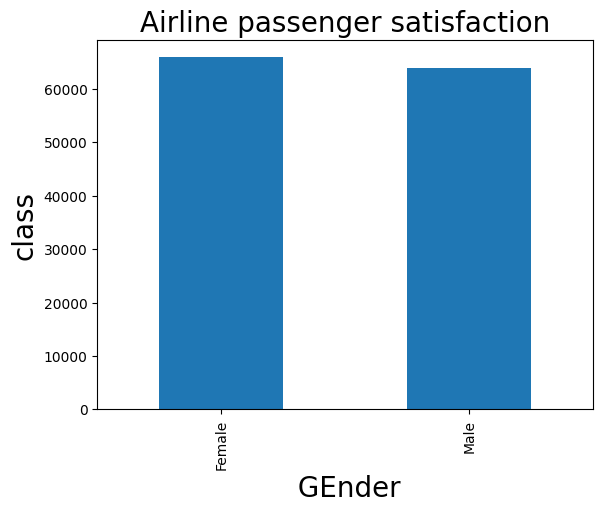

In [13]:
print(data_merge.groupby(['Gender'])['class'].count())
data_merge.groupby(['Gender'])['class'].count().plot(kind="bar")
plt.title("Airline passenger satisfaction",size=20)
plt.xlabel(" GEnder",size=20)
plt.ylabel("class",size=20)
plt.show()

class
0     25966
1    103894
Name: class, dtype: int64
0 = Fake news
1 = True news


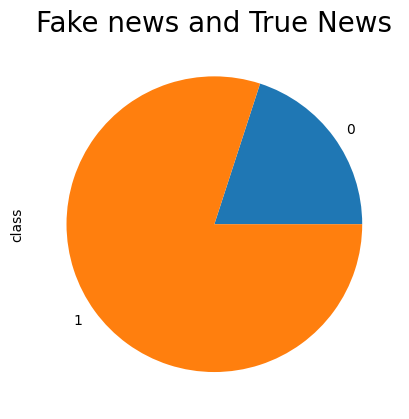

In [14]:
print(data_merge.groupby(['class'])['class'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['class'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [15]:
data = data_merge.drop(["Customer Type","Gender","id"], axis=1)
data.head(10) #displaying remaining dataset

,Unnamed: 0,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
0,0,52,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,1,36,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,satisfied,0
2,2,20,Business travel,Eco,192,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
3,3,44,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,satisfied,0
4,4,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,satisfied,0
5,5,16,Business travel,Eco,311,3,3,3,3,5,...,4,3,1,1,2,5,0,0.0,satisfied,0
6,6,77,Business travel,Business,3987,5,5,5,5,3,...,5,5,5,4,5,3,0,0.0,satisfied,0
7,7,43,Business travel,Business,2556,2,2,2,2,4,...,4,4,4,5,4,3,77,65.0,satisfied,0
8,8,47,Business travel,Eco,556,5,2,2,2,5,...,2,2,5,3,3,5,1,0.0,satisfied,0
9,9,46,Business travel,Business,1744,2,2,2,2,3,...,4,4,4,5,4,4,28,14.0,satisfied,0


In [16]:
data=data.sample(frac=1)
data.head(10)

,Unnamed: 0,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
3267,3267,39,Personal Travel,Eco,1747,1,0,1,4,2,...,3,4,5,5,4,2,26,19.0,neutral or dissatisfied,1
17749,17749,67,Personal Travel,Eco,604,2,4,2,2,3,...,3,4,5,5,5,3,17,17.0,neutral or dissatisfied,0
13881,13881,29,Business travel,Business,2184,3,5,3,3,5,...,5,4,2,4,4,5,4,0.0,satisfied,0
87128,87128,46,Business travel,Business,2295,5,5,5,5,5,...,3,4,4,5,4,5,29,24.0,satisfied,1
66268,66268,40,Business travel,Business,1622,1,1,1,1,4,...,1,1,1,2,1,4,19,29.0,neutral or dissatisfied,1
65876,65876,63,Personal Travel,Eco,722,3,4,3,1,4,...,2,3,2,5,2,2,0,0.0,neutral or dissatisfied,1
103055,103055,27,Personal Travel,Business,689,1,4,0,2,4,...,3,5,5,5,5,4,13,3.0,neutral or dissatisfied,1
5253,5253,59,Business travel,Business,425,2,2,2,2,3,...,4,4,4,4,4,3,0,0.0,satisfied,1
37800,37800,55,Business travel,Business,3249,3,4,4,4,4,...,3,3,3,1,3,1,74,116.0,neutral or dissatisfied,1
52144,52144,27,Personal Travel,Eco,216,1,0,1,1,5,...,3,4,5,4,5,5,0,0.0,neutral or dissatisfied,1


In [17]:
data.isnull().sum()

Unnamed: 0                             0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
class                                  0
dtype: int64

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot


In [19]:
LR=LinearRegression()

In [20]:
time=[[5],[7],[12],[16],[20]]
mass=[40,120,180,210,240]

In [21]:
LR.fit(time,mass)

LinearRegression()

[78.64935065]


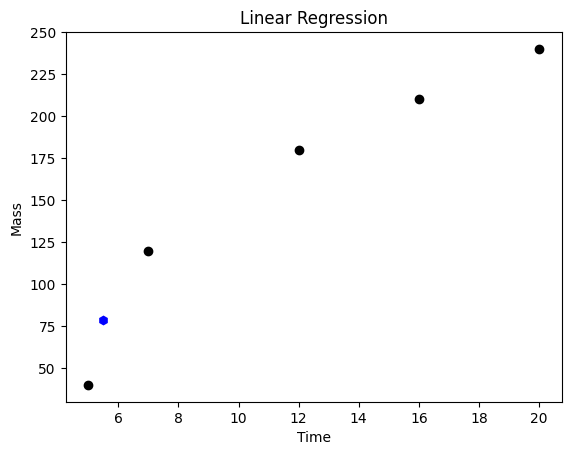

In [22]:
value=LR.predict([[5.5]])
print(value)

#plot the data
plt.scatter(time,mass,color='black')

plt.plot(5.5,value,color='blue',linewidth=3,marker="h")
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Linear Regression')
plt.show()

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
distances=np.array([1,2,5,10,15,20,21,22,23,24,25,26,27,28,29,30,35,40,41,47,50]).reshape(-1,1)
probabilities=np.array([1,1,1,1,1,1,0.9,0.85,0.73,0.67,0.5,0.47,0.39,0.31,0.25,0.15,0,0,0,0,0])

threshold=0
binary_labels=(probabilities > threshold)

logr=LogisticRegression()
logr.fit(distances,binary_labels)

LogisticRegression()

In [24]:
p=logr.predict([[25]])
print(p)

[ True]


In [27]:
if p==[True] :
  print("goal")
else:
  print("no goal")

goal


In [29]:
#predict 100 distances between 1 to 50
#general distances for prediction
dist = np.linspace(1, 50, 100).reshape(-1,1)
print(dist) #distances
#make predictions using the model
prob =logr.predict_proba(dist)
print(prob)

[[ 1.        ]
 [ 1.49494949]
 [ 1.98989899]
 [ 2.48484848]
 [ 2.97979798]
 [ 3.47474747]
 [ 3.96969697]
 [ 4.46464646]
 [ 4.95959596]
 [ 5.45454545]
 [ 5.94949495]
 [ 6.44444444]
 [ 6.93939394]
 [ 7.43434343]
 [ 7.92929293]
 [ 8.42424242]
 [ 8.91919192]
 [ 9.41414141]
 [ 9.90909091]
 [10.4040404 ]
 [10.8989899 ]
 [11.39393939]
 [11.88888889]
 [12.38383838]
 [12.87878788]
 [13.37373737]
 [13.86868687]
 [14.36363636]
 [14.85858586]
 [15.35353535]
 [15.84848485]
 [16.34343434]
 [16.83838384]
 [17.33333333]
 [17.82828283]
 [18.32323232]
 [18.81818182]
 [19.31313131]
 [19.80808081]
 [20.3030303 ]
 [20.7979798 ]
 [21.29292929]
 [21.78787879]
 [22.28282828]
 [22.77777778]
 [23.27272727]
 [23.76767677]
 [24.26262626]
 [24.75757576]
 [25.25252525]
 [25.74747475]
 [26.24242424]
 [26.73737374]
 [27.23232323]
 [27.72727273]
 [28.22222222]
 [28.71717172]
 [29.21212121]
 [29.70707071]
 [30.2020202 ]
 [30.6969697 ]
 [31.19191919]
 [31.68686869]
 [32.18181818]
 [32.67676768]
 [33.17171717]
 [33.66666

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(distance,binary_labels,color='black',label)
pit.plot(dist,prob,color='blue',label='logistic Regression')
plt.title('distance vs')

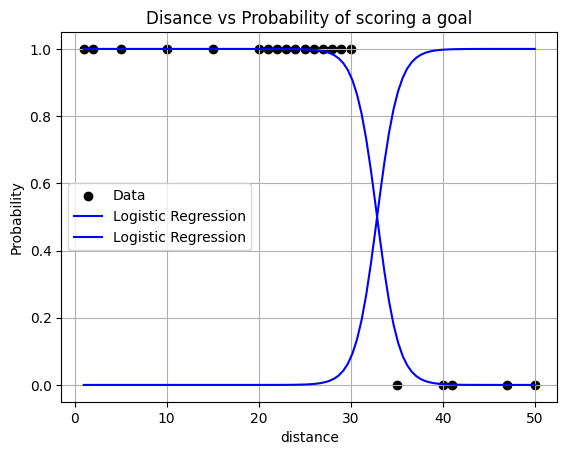

In [30]:
#plotting actual data -train
import matplotlib.pyplot as plt
plt.scatter(distances,binary_labels,color='black',label='Data')
#plotting test data with pedictions
plt.plot(dist,prob,color='blue',label='Logistic Regression')
plt.title('Disance vs Probability of scoring a goal')
plt.xlabel('distance')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/myfolder/demoDT-2.csv")
print(df)

   State  Literacy   Cleanliness   Crime_Rate good
A     92        90            54                 0
B     56        67            50                 1
C     78        80            62                 0
D     85        75            48                 1
E     60        82            55                 0
F     72        78            60                 0
G     88        85            45                 0
H     64        70            58                 1
I     90        88            42                 1
J     68        72            65                 0
K     75        79            57                 0
L     82        86            49                 1
M     58        65            63                 0
N     77        76            52                 0
O     94        91            40                 0
P     63        74            61                 0
Q     79        83            47                 1
R     71        68            59                 1
S     86        89            4

In [4]:
import numpy as np
cr=np.array(['crime_rate']).reshape(-1,1)
y=np.array(['good'])

In [6]:
#create
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [5]:
#load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image

In [19]:
df=pd.read_csv("/content/drive/MyDrive/myfolder/demoDT (1).csv")
print(df)

   State  Literacy   Cleanliness   Crime_Rate  Good
0      A        92            90           54     0
1      B        56            67           50     1
2      C        78            80           62     0
3      D        85            75           48     1
4      E        60            82           55     0
5      F        72            78           60     0
6      G        88            85           45     0
7      H        64            70           58     1
8      I        90            88           42     0
9      J        68            72           65     0
10     K        75            79           57     0
11     L        82            86           49     0
12     M        58            65           63     1
13     N        77            76           52     0
14     O        94            91           40     1
15     P        63            74           61     0
16     Q        79            83           47     0
17     R        71            68           59     0
18     S    

In [24]:
feature_cols = ['Literacy',' Cleanliness',' Crime_Rate']
feature = df[feature_cols]#feature
Target = df.Good #Target Variables

In [25]:
DT = DecisionTreeClassifier()
DT = DT.fit(feature,Target)

In [26]:
l = int(input("Enter Literacy:"))
cl = int(input("Enter Cleanliness:"))
cr = int(input("Enter CrimeRate:"))
pred = DT.predict([[l,cl,cr]])
if pred==1:
  print("Good State")
else:
  print("Bad State")

Enter Literacy:55
Enter Cleanliness:67
Enter CrimeRate:8
Good State


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.4, 0.9285714285714286, 'x[0] <= 59.0\ngini = 0.473\nsamples = 26\nvalue = [16, 10]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.7857142857142857, 'x[0] <= 82.5\ngini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(0.3, 0.6428571428571429, 'x[1] <= 73.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.2, 0.5, 'x[2] <= 58.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.35714285714285715, 'x[1] <= 70.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.21428571428571427, 'x[0] <= 67.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7, 0.6428571428

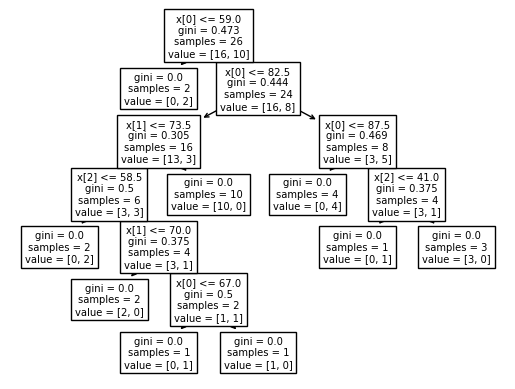

In [28]:
plot_tree(DT)

In [29]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [30]:
df=pd.read_csv("/content/drive/MyDrive/myfolder/demoDT (1).csv")
print(df)

   State  Literacy   Cleanliness   Crime_Rate  Good
0      A        92            90           54     0
1      B        56            67           50     1
2      C        78            80           62     0
3      D        85            75           48     1
4      E        60            82           55     0
5      F        72            78           60     0
6      G        88            85           45     0
7      H        64            70           58     1
8      I        90            88           42     0
9      J        68            72           65     0
10     K        75            79           57     0
11     L        82            86           49     0
12     M        58            65           63     1
13     N        77            76           52     0
14     O        94            91           40     1
15     P        63            74           61     0
16     Q        79            83           47     0
17     R        71            68           59     0
18     S    

In [31]:
feature_cols = ['Literacy',' Cleanliness',' Crime_Rate']
feature = df[feature_cols]#feature
Target = df.Good #Target Variables

In [32]:
RF = RondomForestClassifier()
RF = DT.fit(feature,Target)

In [33]:
l =  (input("Enter Literacy:"))
cl = int(input("Enter Cleanliness:"))
cr = int(input("Enter CrimeRate:"))
pred = DT.predict([[l,cl,cr]])
if pred==1:
  print("Good State")
else:
  print("Bad State")

Enter Literacy:90
Enter Cleanliness:80
Enter CrimeRate:20
Good State


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
import os
output_dir = "ture_visualization"
os.makedirs(output_dir,exist_ok=True)

In [ ]:
RF.estima
